# Predicting Melbourne House Price in [InClass] Kaggle Competition
### References:
#### https://www.kaggle.com/c/home-data-for-ml-course
#### https://www.kaggle.com/learn/intro-to-machine-learning

## Introduction
As different regression algirithms exists, house price will be predicted with few of the basic algorithms such as Decision Tree and Random Forrest. Then optimization will be perfomred and get evaluatated for the performance. Once best model is identified, prediction will be made against that model and predictions will then be uploaded into Kaggle competion for scoring.

In [340]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)

%matplotlib inline

In [233]:
# Loads training and test data
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [173]:
# Shows how the training data looks like
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [174]:
# Gets the statistics of the training data
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [175]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [176]:
# Fow now, let's not consider the following columns as features
# 'Id', 'Street', 'Alley', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 
# 'BldgType', 'HouseStyle', 'YearRemodAdd', 'RoofStyle',
# 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterCond', 'Foundation', 'BsmtCond', 'BsmtExposure', 
# 'BsmtFinType1', BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'HeatingQC', 
# 'Electrical', 'LowQualFinSF',
#'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Functional', 'Fireplaces', 
# 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageQual', 
# 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
# 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 

# Below ones are the features, both categorical and non-categorical, are of our interest.

features = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'Neighborhood', 
            'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrType', 'ExterQual', 'BsmtQual', 'TotalBsmtSF', 
            'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd',             
            'GarageType', 'GarageFinish', 'GarageArea', 'PavedDrive', 'SaleCondition']

In [234]:
train_data = train_data[["Id"] + features + ["SalePrice"]]
test_data = test_data[["Id"] + features]

### Preprocessing data
This includes filling missing data and encoding them for both training and test data.

In [235]:
# MSSubClass - a ordinal feature, was encoded
# Dictionary was made manually as few subclasses are there in test data, but not in train data.

mssubclass_dict = {20: 1, 30: 2, 40: 3, 45: 4, 50: 5, 60: 6, 70: 7, 75: 8, 80: 9, 85: 10, 90: 11, 
                   120: 12, 150: 13, 160: 14, 180: 15, 190: 16}
train_data.MSSubClass = train_data.MSSubClass.replace(mssubclass_dict)
test_data.MSSubClass = test_data.MSSubClass.replace(mssubclass_dict)

In [236]:
# MSZoning - a nominal feature, was filled for missing values and one-hot-encoded.

test_data.MSZoning.fillna(test_data.MSZoning.value_counts().index[0], inplace=True)
train_data = train_data.join(pd.get_dummies(train_data.MSZoning, prefix="MSZoning")).drop(["MSZoning"], axis=1)
test_data = test_data.join(pd.get_dummies(test_data.MSZoning, prefix="MSZoning")).drop(["MSZoning"], axis=1)

In [237]:
# LotFrontage - a numeric feature, was filled for missing values with average

train_data.LotFrontage.fillna(train_data.LotFrontage.mean(), inplace=True)
test_data.LotFrontage.fillna(test_data.LotFrontage.mean(), inplace=True)

In [238]:
# LotShape - a ordinal feature, was encoded

lotshape_dict = {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1}
train_data.LotShape = train_data.LotShape.replace(lotshape_dict)
test_data.LotShape = test_data.LotShape.replace(lotshape_dict)

In [239]:
# Neighborhood - a nominal feature, was one-hot-encoded.

train_data = train_data.join(pd.get_dummies(train_data.Neighborhood, prefix="Neighborhood")).drop(["Neighborhood"], axis=1)
test_data = test_data.join(pd.get_dummies(test_data.Neighborhood, prefix="Neighborhood")).drop(["Neighborhood"], axis=1)

In [240]:
# MasVnrType - considering it a nominal features, missing values were filled in and it was one-hot-encoded.

train_data.MasVnrType.fillna(train_data.MasVnrType.value_counts().index[0], inplace=True)
test_data.MasVnrType.fillna(test_data.MasVnrType.value_counts().index[0], inplace=True)

train_data = train_data.join(pd.get_dummies(train_data.MasVnrType, prefix="MasVnrType")).drop(["MasVnrType"], axis=1)
test_data = test_data.join(pd.get_dummies(test_data.MasVnrType, prefix="MasVnrType")).drop(["MasVnrType"], axis=1)

In [241]:
# ExterQual - a ordinal feature, was encoded

exterqual_dict = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
train_data.ExterQual = train_data.ExterQual.replace(exterqual_dict)
test_data.ExterQual = test_data.ExterQual.replace(exterqual_dict)

In [242]:
# BsmtQual - a ordinal features, missing values were filled in and it was encoded.

train_data.BsmtQual.fillna(train_data.BsmtQual.value_counts().index[0], inplace=True)
test_data.BsmtQual.fillna(test_data.BsmtQual.value_counts().index[0], inplace=True)

bsmtqual_dict = {'NA': 1, 'Po': 2, 'Fa': 3, 'TA': 4, 'Gd': 5, 'Ex': 6}
train_data.BsmtQual = train_data.BsmtQual.replace(bsmtqual_dict)
test_data.BsmtQual = test_data.BsmtQual.replace(bsmtqual_dict)

In [243]:
# TotalBsmtSF - a numeric feature, was filled for missing values in test data with average
test_data.TotalBsmtSF.fillna(test_data.TotalBsmtSF.median(), inplace=True)
test_data.TotalBsmtSF = test_data.TotalBsmtSF.astype('int')

In [244]:
# CentralAir - a ordinal feature, was encoded

centralac_dict = {'N': 1, 'Y': 2}
train_data.CentralAir = train_data.CentralAir.replace(centralac_dict)
test_data.CentralAir = test_data.CentralAir.replace(centralac_dict)

In [245]:
# KitchenQual - a ordinal feature, was encoded after filling in a missing value in test data

kitchenqual_dict = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

test_data.KitchenQual.fillna(test_data.KitchenQual.value_counts().index[0], inplace=True)
train_data.KitchenQual = train_data.KitchenQual.replace(kitchenqual_dict)
test_data.KitchenQual = test_data.KitchenQual.replace(kitchenqual_dict)

In [246]:
# GarageType - a nominal feature, was filled in for missing values and then one-hot-encoded

train_data.GarageType.fillna(train_data.GarageType.value_counts().index[0], inplace=True)
test_data.GarageType.fillna(test_data.GarageType.value_counts().index[0], inplace=True)

train_data = train_data.join(pd.get_dummies(train_data.GarageType, prefix="GarageType")).drop(["GarageType"], axis=1)
test_data = test_data.join(pd.get_dummies(test_data.GarageType, prefix="GarageType")).drop(["GarageType"], axis=1)

In [247]:
# GarageFinish - a ordinal feature, was filled in for missing values and then encoded
train_data.GarageFinish.fillna(train_data.GarageFinish.value_counts().index[0], inplace=True)
test_data.GarageFinish.fillna(test_data.GarageFinish.value_counts().index[0], inplace=True)

garagefinish_dict = {'NA': 1, 'Unf': 2, 'RFn': 3, 'Fin': 4}
train_data.GarageFinish = train_data.GarageFinish.replace(garagefinish_dict)
test_data.GarageFinish = test_data.GarageFinish.replace(garagefinish_dict)

In [248]:
# GarageArea - a numerical feature, was filled in for missing value in test data.
test_data.GarageArea.fillna(test_data.GarageArea.median(), inplace=True)
test_data.GarageArea = test_data.GarageArea.astype('int')

In [249]:
# PavedDrive - a ordinal feature, was encoded
paveddrive_dict = {'N': 1, 'P': 2, 'Y': 3}
train_data.PavedDrive = train_data.PavedDrive.replace(paveddrive_dict)
test_data.PavedDrive = test_data.PavedDrive.replace(paveddrive_dict)

In [250]:
# SaleCondition - a nominal feature, was one-hot-encoded

train_data = train_data.join(pd.get_dummies(train_data.SaleCondition, prefix="SaleCondition")).drop(["SaleCondition"], axis=1)
test_data = test_data.join(pd.get_dummies(test_data.SaleCondition, prefix="SaleCondition")).drop(["SaleCondition"], axis=1)

In [263]:
train_data.columns.get_loc("SalePrice")

21

In [266]:
train_data.copy().drop(["Id", "SalePrice"], axis=1)

,MSSubClass,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearBuilt,ExterQual,BsmtQual,TotalBsmtSF,...,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,6,65.0,8450,4,7,5,2003,4,5,856,...,0,0,0,0,0,0,0,0,1,0
1,1,80.0,9600,4,6,8,1976,3,5,1262,...,0,0,0,0,0,0,0,0,1,0
2,6,68.0,11250,3,7,5,2001,4,5,920,...,0,0,0,0,0,0,0,0,1,0
3,7,60.0,9550,3,7,5,1915,3,4,756,...,0,0,0,1,1,0,0,0,0,0
4,6,84.0,14260,3,8,5,2000,4,5,1145,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,62.0,7917,4,6,5,1999,3,5,953,...,0,0,0,0,0,0,0,0,1,0
1456,1,85.0,13175,4,6,6,1978,3,5,1542,...,0,0,0,0,0,0,0,0,1,0
1457,7,66.0,9042,4,7,9,1941,5,4,1152,...,0,0,0,0,0,0,0,0,1,0
1458,1,68.0,9717,4,5,6,1950,3,4,1078,...,0,0,0,0,0,0,0,0,1,0


### Decision Tree - Let's first get started with it

In [267]:
# Creates training label
y = train_data.SalePrice

# Creates a dataset with feates we are interested in
X = train_data.copy().drop(["Id", "SalePrice"], axis=1)

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [268]:
print("train_X shape: ", train_X.shape, ", val_X shape: ", val_X.shape,
      "train_y shape: ", train_y.shape, ", val_y shape: ", val_y.shape)

train_X shape:  (1095, 66) , val_X shape:  (365, 66) train_y shape:  (1095,) , val_y shape:  (365,)


#### Let's first get predictions on default Decision Tree model.

In [343]:
# Creates model without max. leaf nodes parameter
dt_model = DecisionTreeRegressor(random_state=1)

# Fits model
dt_model.fit(train_X, train_y)

# Performes predictions on validation data and calculates mean absolute error
dt_val_predictions = dt_model.predict(val_X)
dt_val_mae = mean_absolute_error(dt_val_predictions, val_y)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(dt_val_mae))

Validation MAE when not specifying max_leaf_nodes: 23,661


#### Now, create Decision Tree model by passing variying number of max. leaf nodes as parameter and observe prediction performance.

In [344]:
# Creates a list to store the Mean Absolute Error against validation data
dt_val_maes = []

In [345]:
# Now, loops through max. leaf nodes count and store Mean Absolute Error (MAE)

for i in range(2, 500):
    dt_model = DecisionTreeRegressor(max_leaf_nodes=i, random_state=1)
    dt_model.fit(train_X, train_y)
    dt_val_predictions = dt_model.predict(val_X)
    dt_val_mae = mean_absolute_error(dt_val_predictions, val_y)
    print("Max. Leaf Nodes: ", i, "Validation MAE: {:,.0f}".format(dt_val_mae))
    dt_val_maes.append(dt_val_mae)

Max. Leaf Nodes:  2 Validation MAE: 42,962
Max. Leaf Nodes:  3 Validation MAE: 36,153
Max. Leaf Nodes:  4 Validation MAE: 33,781
Max. Leaf Nodes:  5 Validation MAE: 31,249
Max. Leaf Nodes:  6 Validation MAE: 32,330
Max. Leaf Nodes:  7 Validation MAE: 30,945
Max. Leaf Nodes:  8 Validation MAE: 29,543
Max. Leaf Nodes:  9 Validation MAE: 28,062
Max. Leaf Nodes:  10 Validation MAE: 28,279
Max. Leaf Nodes:  11 Validation MAE: 29,061
Max. Leaf Nodes:  12 Validation MAE: 28,702
Max. Leaf Nodes:  13 Validation MAE: 28,220
Max. Leaf Nodes:  14 Validation MAE: 27,618
Max. Leaf Nodes:  15 Validation MAE: 27,276
Max. Leaf Nodes:  16 Validation MAE: 26,589
Max. Leaf Nodes:  17 Validation MAE: 25,654
Max. Leaf Nodes:  18 Validation MAE: 25,349
Max. Leaf Nodes:  19 Validation MAE: 24,631
Max. Leaf Nodes:  20 Validation MAE: 24,109
Max. Leaf Nodes:  21 Validation MAE: 24,084
Max. Leaf Nodes:  22 Validation MAE: 23,980
Max. Leaf Nodes:  23 Validation MAE: 24,936
Max. Leaf Nodes:  24 Validation MAE: 25,

Max. Leaf Nodes:  198 Validation MAE: 23,660
Max. Leaf Nodes:  199 Validation MAE: 23,646
Max. Leaf Nodes:  200 Validation MAE: 23,642
Max. Leaf Nodes:  201 Validation MAE: 23,670
Max. Leaf Nodes:  202 Validation MAE: 23,542
Max. Leaf Nodes:  203 Validation MAE: 23,542
Max. Leaf Nodes:  204 Validation MAE: 23,582
Max. Leaf Nodes:  205 Validation MAE: 23,424
Max. Leaf Nodes:  206 Validation MAE: 23,367
Max. Leaf Nodes:  207 Validation MAE: 23,234
Max. Leaf Nodes:  208 Validation MAE: 23,202
Max. Leaf Nodes:  209 Validation MAE: 23,154
Max. Leaf Nodes:  210 Validation MAE: 23,232
Max. Leaf Nodes:  211 Validation MAE: 23,272
Max. Leaf Nodes:  212 Validation MAE: 23,276
Max. Leaf Nodes:  213 Validation MAE: 23,261
Max. Leaf Nodes:  214 Validation MAE: 23,224
Max. Leaf Nodes:  215 Validation MAE: 23,219
Max. Leaf Nodes:  216 Validation MAE: 23,259
Max. Leaf Nodes:  217 Validation MAE: 23,247
Max. Leaf Nodes:  218 Validation MAE: 23,356
Max. Leaf Nodes:  219 Validation MAE: 23,384
Max. Leaf 

Max. Leaf Nodes:  391 Validation MAE: 23,459
Max. Leaf Nodes:  392 Validation MAE: 23,461
Max. Leaf Nodes:  393 Validation MAE: 23,483
Max. Leaf Nodes:  394 Validation MAE: 23,483
Max. Leaf Nodes:  395 Validation MAE: 23,459
Max. Leaf Nodes:  396 Validation MAE: 23,491
Max. Leaf Nodes:  397 Validation MAE: 23,464
Max. Leaf Nodes:  398 Validation MAE: 23,464
Max. Leaf Nodes:  399 Validation MAE: 23,474
Max. Leaf Nodes:  400 Validation MAE: 23,474
Max. Leaf Nodes:  401 Validation MAE: 23,501
Max. Leaf Nodes:  402 Validation MAE: 23,473
Max. Leaf Nodes:  403 Validation MAE: 23,473
Max. Leaf Nodes:  404 Validation MAE: 23,478
Max. Leaf Nodes:  405 Validation MAE: 23,482
Max. Leaf Nodes:  406 Validation MAE: 23,482
Max. Leaf Nodes:  407 Validation MAE: 23,482
Max. Leaf Nodes:  408 Validation MAE: 23,588
Max. Leaf Nodes:  409 Validation MAE: 23,588
Max. Leaf Nodes:  410 Validation MAE: 23,588
Max. Leaf Nodes:  411 Validation MAE: 23,588
Max. Leaf Nodes:  412 Validation MAE: 23,588
Max. Leaf 

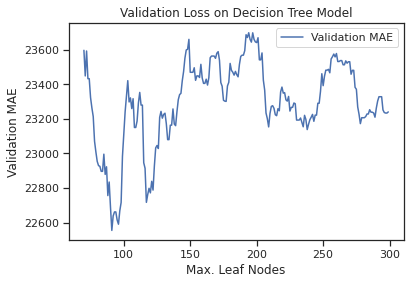

In [346]:
# Now, plots validation errors to visualize

plt.plot(range(70, 300), dt_val_maes[68:298], "b", label="Validation MAE")
plt.title("Validation Loss on Decision Tree Model")
plt.xlabel("Max. Leaf Nodes")
plt.ylabel("Validation MAE")
plt.legend()
plt.show()

In [347]:
# It seems from the above plot that MAE is lowest at some point when value of max. leaf nodes is somewhere between
# 60 and 100. Let's find that.

dt_val_mae_min = min(dt_val_maes)

print("So, the lowest validation MAE for validation data ", dt_val_mae_min,
     "and the value for max. leaf nodes for which it is the lowest is ", dt_val_maes.index(dt_val_mae_min))

So, the lowest validation MAE for validation data  22554.904430428254 and the value for max. leaf nodes for which it is the lowest is  89


### Random Forest - Now, build model on it and compare its performance with that of Decision Tree

In [348]:
# Creates model without max. leaf nodes parameter
rf_model = RandomForestRegressor(random_state=1)

# Fits model
rf_model.fit(train_X, train_y)

# Performes predictions on validation data and calculates mean absolute error
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(rf_val_mae))

Validation MAE when not specifying max_leaf_nodes: 17,327


In [349]:
# Creates a list to store the Mean Absolute Error against validation data
rf_val_maes = []

In [350]:
# Now, loops through max. leaf nodes count and store Mean Absolute Error (MAE)

for i in range(2, 500):
    rf_model = RandomForestRegressor(max_leaf_nodes=i, random_state=1)
    rf_model.fit(train_X, train_y)
    rf_val_predictions = rf_model.predict(val_X)
    rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)
    print("Max. Leaf Nodes: ", i, "Validation MAE: {:,.0f}".format(rf_val_mae))
    rf_val_maes.append(rf_val_mae)

Max. Leaf Nodes:  2 Validation MAE: 39,257
Max. Leaf Nodes:  3 Validation MAE: 32,573
Max. Leaf Nodes:  4 Validation MAE: 30,181
Max. Leaf Nodes:  5 Validation MAE: 28,479
Max. Leaf Nodes:  6 Validation MAE: 27,203
Max. Leaf Nodes:  7 Validation MAE: 26,294
Max. Leaf Nodes:  8 Validation MAE: 25,491
Max. Leaf Nodes:  9 Validation MAE: 24,718
Max. Leaf Nodes:  10 Validation MAE: 24,030
Max. Leaf Nodes:  11 Validation MAE: 23,331
Max. Leaf Nodes:  12 Validation MAE: 22,953
Max. Leaf Nodes:  13 Validation MAE: 22,546
Max. Leaf Nodes:  14 Validation MAE: 22,270
Max. Leaf Nodes:  15 Validation MAE: 21,898
Max. Leaf Nodes:  16 Validation MAE: 21,622
Max. Leaf Nodes:  17 Validation MAE: 21,398
Max. Leaf Nodes:  18 Validation MAE: 21,193
Max. Leaf Nodes:  19 Validation MAE: 21,026
Max. Leaf Nodes:  20 Validation MAE: 20,873
Max. Leaf Nodes:  21 Validation MAE: 20,727
Max. Leaf Nodes:  22 Validation MAE: 20,595
Max. Leaf Nodes:  23 Validation MAE: 20,466
Max. Leaf Nodes:  24 Validation MAE: 20,

Max. Leaf Nodes:  187 Validation MAE: 17,293
Max. Leaf Nodes:  188 Validation MAE: 17,285
Max. Leaf Nodes:  189 Validation MAE: 17,286
Max. Leaf Nodes:  190 Validation MAE: 17,284
Max. Leaf Nodes:  191 Validation MAE: 17,277
Max. Leaf Nodes:  192 Validation MAE: 17,272
Max. Leaf Nodes:  193 Validation MAE: 17,272
Max. Leaf Nodes:  194 Validation MAE: 17,268
Max. Leaf Nodes:  195 Validation MAE: 17,265
Max. Leaf Nodes:  196 Validation MAE: 17,262
Max. Leaf Nodes:  197 Validation MAE: 17,267
Max. Leaf Nodes:  198 Validation MAE: 17,262
Max. Leaf Nodes:  199 Validation MAE: 17,261
Max. Leaf Nodes:  200 Validation MAE: 17,262
Max. Leaf Nodes:  201 Validation MAE: 17,256
Max. Leaf Nodes:  202 Validation MAE: 17,251
Max. Leaf Nodes:  203 Validation MAE: 17,255
Max. Leaf Nodes:  204 Validation MAE: 17,260
Max. Leaf Nodes:  205 Validation MAE: 17,260
Max. Leaf Nodes:  206 Validation MAE: 17,263
Max. Leaf Nodes:  207 Validation MAE: 17,268
Max. Leaf Nodes:  208 Validation MAE: 17,267
Max. Leaf 

Max. Leaf Nodes:  370 Validation MAE: 17,266
Max. Leaf Nodes:  371 Validation MAE: 17,269
Max. Leaf Nodes:  372 Validation MAE: 17,268
Max. Leaf Nodes:  373 Validation MAE: 17,269
Max. Leaf Nodes:  374 Validation MAE: 17,272
Max. Leaf Nodes:  375 Validation MAE: 17,273
Max. Leaf Nodes:  376 Validation MAE: 17,270
Max. Leaf Nodes:  377 Validation MAE: 17,272
Max. Leaf Nodes:  378 Validation MAE: 17,272
Max. Leaf Nodes:  379 Validation MAE: 17,272
Max. Leaf Nodes:  380 Validation MAE: 17,272
Max. Leaf Nodes:  381 Validation MAE: 17,269
Max. Leaf Nodes:  382 Validation MAE: 17,269
Max. Leaf Nodes:  383 Validation MAE: 17,268
Max. Leaf Nodes:  384 Validation MAE: 17,269
Max. Leaf Nodes:  385 Validation MAE: 17,267
Max. Leaf Nodes:  386 Validation MAE: 17,265
Max. Leaf Nodes:  387 Validation MAE: 17,263
Max. Leaf Nodes:  388 Validation MAE: 17,265
Max. Leaf Nodes:  389 Validation MAE: 17,265
Max. Leaf Nodes:  390 Validation MAE: 17,264
Max. Leaf Nodes:  391 Validation MAE: 17,266
Max. Leaf 

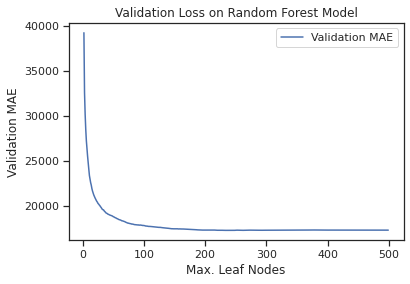

In [351]:
# Now, plots validation errors to visualize

plt.plot(range(2, 500), rf_val_maes[:], "b", label="Validation MAE")
plt.title("Validation Loss on Random Forest Model")
plt.xlabel("Max. Leaf Nodes")
plt.ylabel("Validation MAE")
plt.legend()
plt.show()

In [352]:
# It seems from the above plot that MAE is getting lower further beyond a point when value of max. leaf nodes is 
# crossing 200.

rf_val_mae_min = min(rf_val_maes)

print("So, the lowest validation MAE for validation data ", rf_val_mae_min,
     "and the value for max. leaf nodes for which it is the lowest is ", rf_val_maes.index(rf_val_mae_min))

So, the lowest validation MAE for validation data  17225.294606825155 and the value for max. leaf nodes for which it is the lowest is  238


#### Now, create a Final Model for the competition and submit predictions

Let's build the final model on Random Forest as it predicts better over Decision Tree model. The model will be built on full train data.

In [356]:
rf_model_on_full_data = RandomForestRegressor(max_leaf_nodes=rf_val_maes.index(rf_val_mae_min), random_state=1)

In [357]:
# Trains model on all data
rf_model_on_full_data.fit(X, y)

# Creates a test dataset removing Id column
test_X = test_data.copy().drop(["Id"], axis=1)

# Now, predicts on test data
rf_model_test_data_predictions = rf_model_on_full_data.predict(test_X)

# Creates a data frame out of predictions and save in a physical file to be uploaded into Kaggle competiion site.
prediction_output = pd.DataFrame({'Id': test_data.Id, 'SalePrice': rf_model_test_data_predictions})
prediction_output.to_csv('Predictions.csv', index=False)

# The above output file was uploaded into Kaggle and score (MAE) returned was 17203.28441.

## Rough Work

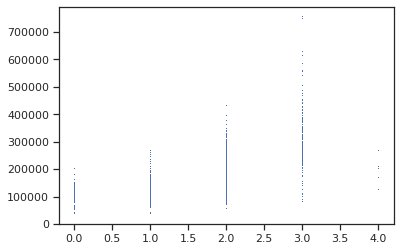

In [107]:
plt.plot(train_data["GarageCars"], train_data.SalePrice, ',')

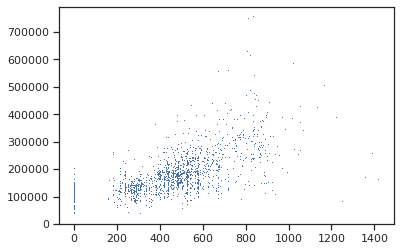

In [133]:
plt.plot(train_data["GarageArea"], train_data.SalePrice, ',')

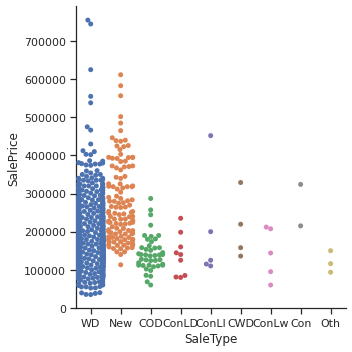

In [148]:
sns.catplot(x="SaleType", y="SalePrice", kind="swarm", data=train_data);

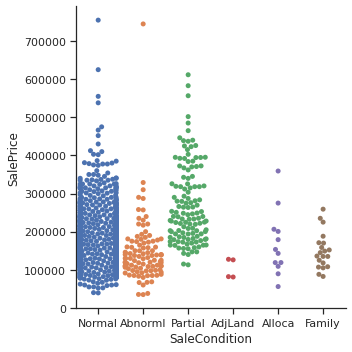

In [169]:
sns.catplot(x="SaleCondition", y="SalePrice", kind="swarm", data=train_data);